<a href="https://colab.research.google.com/github/Manasa1205/DataScienceProjects/blob/main/EDA_of_a_large_scale_fish_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET DESCRIPTION

This dataset contains 9 different seafood types collected from a supermarket in Izmir, Turkey
for a university-industry collaboration project at Izmir University of Economics, and this work
was published in ASYU 2020.
Dataset includes, gilt head bream, red sea bream, sea bass, red mullet, horse mackerel,
black sea sprat, striped red mullet, trout, shrimp image samples.
Images were collected via 2 different cameras, Kodak Easyshare Z650 and Samsung ST60.
Therefore, the resolution of the images are 2832 x 2128, 1024 x 768, respectively.

Before the segmentation, feature extraction and classification process, the dataset was resized to 590 x 445
by preserving the aspect ratio. After resizing the images, all labels in the dataset were augmented (by flipping and rotating).

At the end of the augmentation process, the number of total images for each class became 2000; 1000 for the RGB fish images
and 1000 for their pair-wise ground truth labels.

The dataset contains 9 different seafood types. For each class, there are 1000 augmented images and their pair-waise augmented ground truths.
Each class can be found in the "Fish_Dataset" file with their ground truth labels. All images for each class are ordered from "00000.png" to "01000.png".


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset



In [ ]:
# importing packages
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading the CSV file
data_fish = pd.read_csv("Fish.csv")
# Printing top 5 rows
data_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Provide descriptions of your sample and features

In [ ]:
print(data_fish.shape)
print("***********")
print(data_fish.info())
print("***********")
print(data_fish.describe())
print("***********")
print(data_fish.drop_duplicates(subset ="Species",))
print("***********")
data_fish.Species.unique()
print("***********")
data_fish.value_counts("Species")

(159, 7)
***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
***********
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800   

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

The given fish dataframe dataframe contains 7 columns and 159 rows. With other words: 67 features and 159 observations.

Only one column named 'Species' has categorical data and all the other columns are of the numeric type with non-Null entries.

We can see the count of all columns named 'Weight','Length1','Length2','Length3','Height','Width' with their mean value, standard deviation, minimum and maximum values.

The drop_duplicates() method removes duplicate rows of the column 'Species'.

The unique() function is used to get unique values of column 'Species'.

The value_counts() method returns the count of unique entries in the mentioned column 'Species'

### 2. Check for missing data

In [ ]:
data_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

dataframe.isnull().sum() returns the number of missing values in the dataframe

### 3. Identify the shape of your data

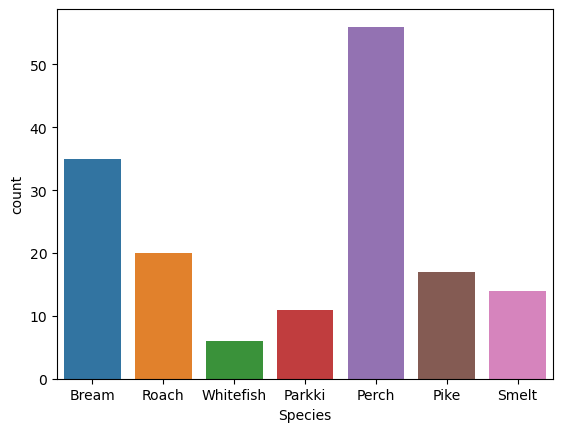

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='Species', data=data_fish, )
plt.show()

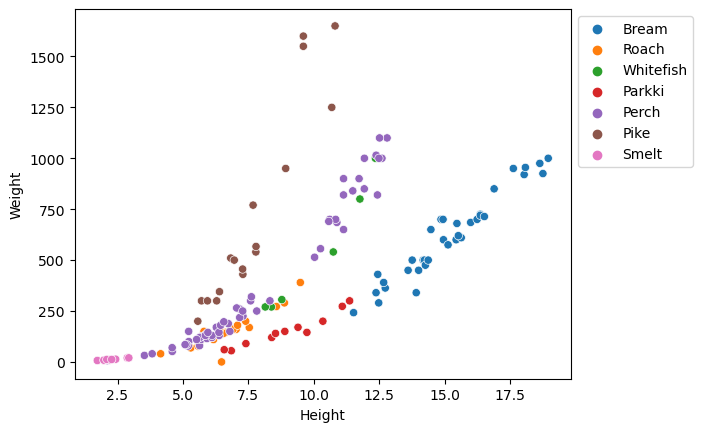

In [ ]:
#Comparing Weight and Height
sns.scatterplot(x='Height', y='Weight',
                hue='Species', data=data_fish, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

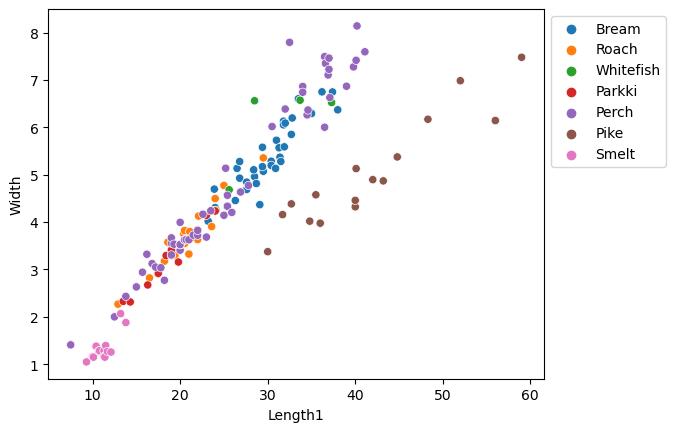

In [ ]:
#Comparing Length1 and Width
sns.scatterplot(x='Length1', y='Width',
                hue='Species', data=data_fish, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

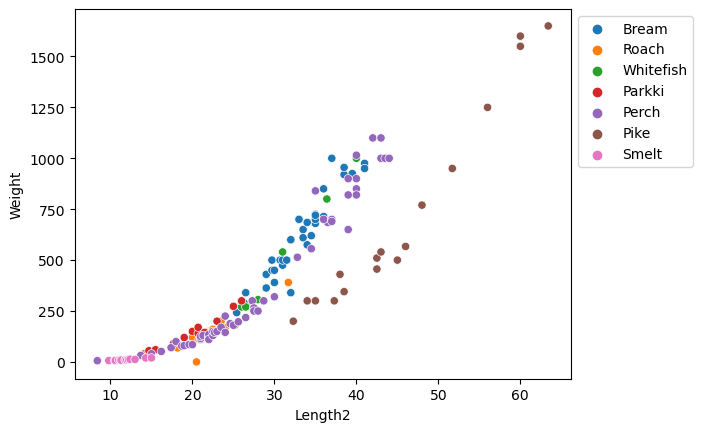

In [ ]:
#Comparing Length2 and Weight
sns.scatterplot(x='Length2', y='Weight',
                hue='Species', data=data_fish, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

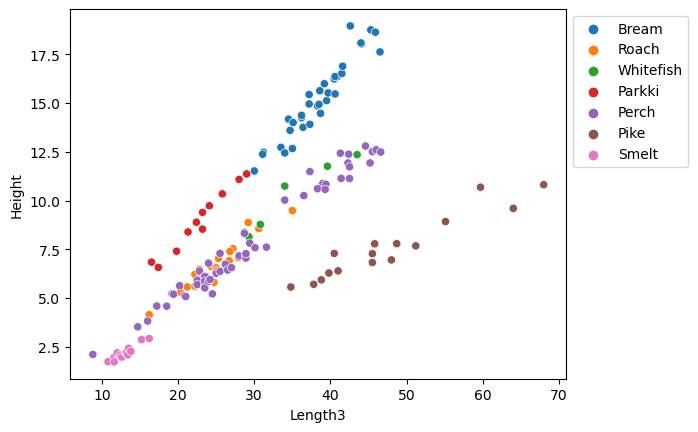

In [ ]:
#Comparing Length3 and Height
sns.scatterplot(x='Length3', y='Height',
                hue='Species', data=data_fish, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

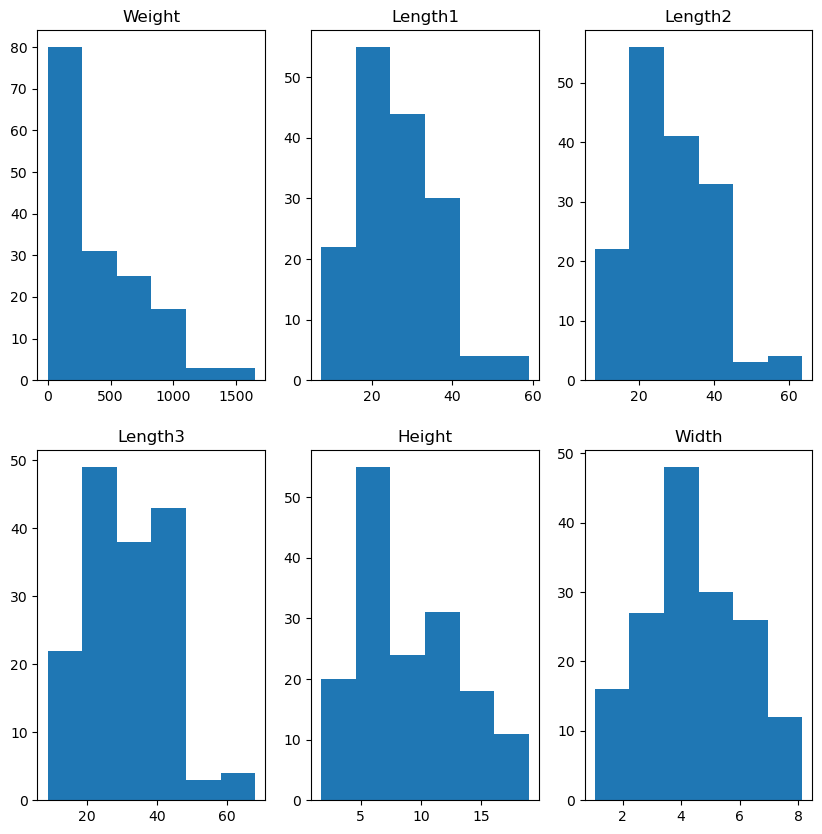

In [ ]:
#histograms
fig, axes = plt.subplots(2, 3, figsize=(10,10))

axes[0,0].set_title("Weight")
axes[0,0].hist(data_fish['Weight'], bins=6)

axes[0,1].set_title("Length1")
axes[0,1].hist(data_fish['Length1'], bins=6);

axes[0,2].set_title("Length2")
axes[0,2].hist(data_fish['Length2'], bins=6);

axes[1,0].set_title("Length3")
axes[1,0].hist(data_fish['Length3'], bins=6);

axes[1,1].set_title("Height")
axes[1,1].hist(data_fish['Height'], bins=6);

axes[1,2].set_title("Width")
axes[1,2].hist(data_fish['Width'], bins=6);


/Users/manasavardhini/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/manasavardhini/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

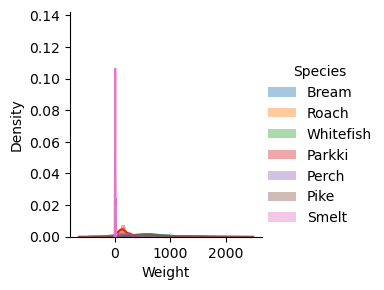

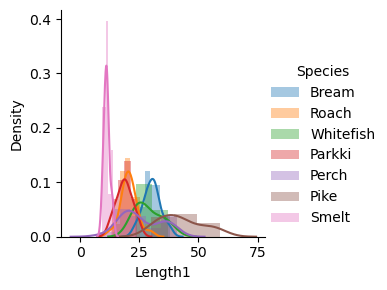

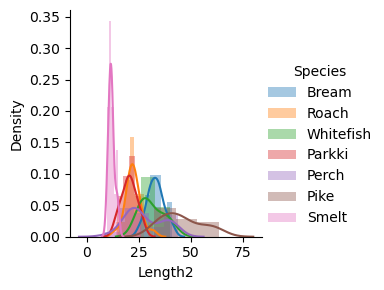

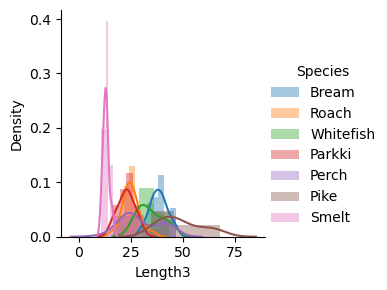

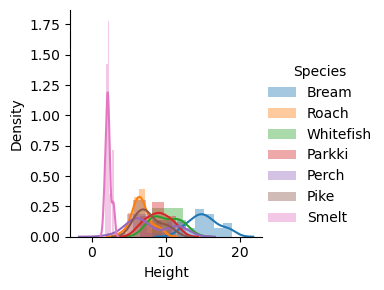

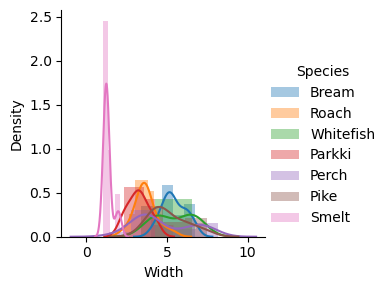

In [ ]:
plot = sns.FacetGrid(data_fish, hue="Species")
plot.map(sns.distplot, "Weight").add_legend()

plot = sns.FacetGrid(data_fish, hue="Species")
plot.map(sns.distplot, "Length1").add_legend()

plot = sns.FacetGrid(data_fish, hue="Species")
plot.map(sns.distplot, "Length2").add_legend()

plot = sns.FacetGrid(data_fish, hue="Species")
plot.map(sns.distplot, "Length3").add_legend()

plot = sns.FacetGrid(data_fish, hue="Species")
plot.map(sns.distplot, "Height").add_legend()

plot = sns.FacetGrid(data_fish, hue="Species")
plot.map(sns.distplot, "Width").add_legend()

plt.show()

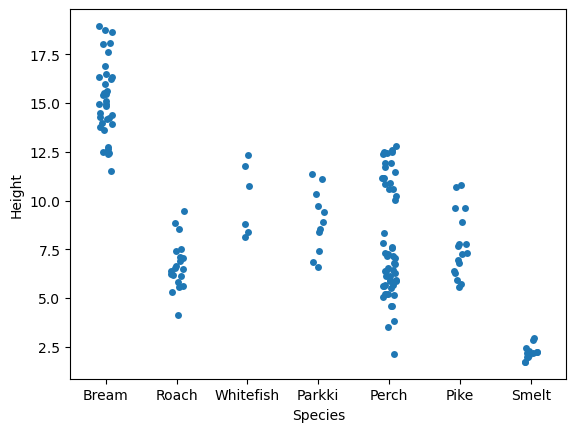

In [ ]:
# Height using a Strip plot
sns.stripplot(y ='Height', x = 'Species', data = data_fish)
plt.show()

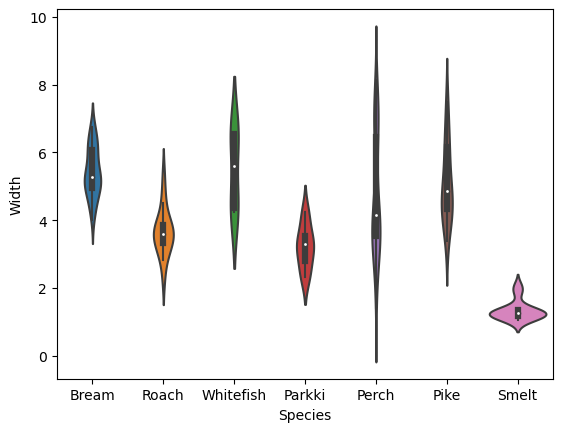

In [ ]:
# Width using a violin plot
sns.violinplot(x="Species", y="Width", data=data_fish, size=6)
plt.show()

Here, we are using Countplot,Scatterplot,Histogram,Distplot, Facetgrid,strip plot,violin plot
Count plot: countplot plots the count of the number of records by category.
Scatter plot: A scatter plot is a set of points plotted on a horizontal and vertical axes.
Histogram: The height of each bar represents the number of values in the data set that fall within a particular bin.
Distplot: A distplot plots a univariate distribution of observations. Facetgrid:
Strip plot: It is basically a scatter plot that differentiates different categories. The values are plotted as dots along one unique axis, and the dots with the same value can overlap.
Violin plot: tool to visualize samples of small sizes.

# 4. Identify significant correlations

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


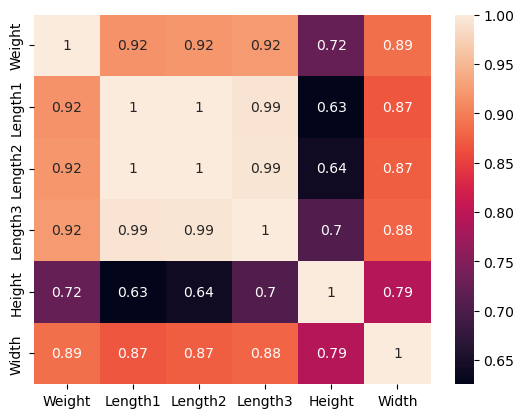

In [ ]:
print(data_fish.corr(method='pearson', numeric_only = True))
sns.heatmap(data_fish.corr(method='pearson', numeric_only = True),annot = True);
plt.show()

Correlation:
The statistical relationship between two variables is referred to as their correlation.

### 5. Spot outliers and what to do with them?

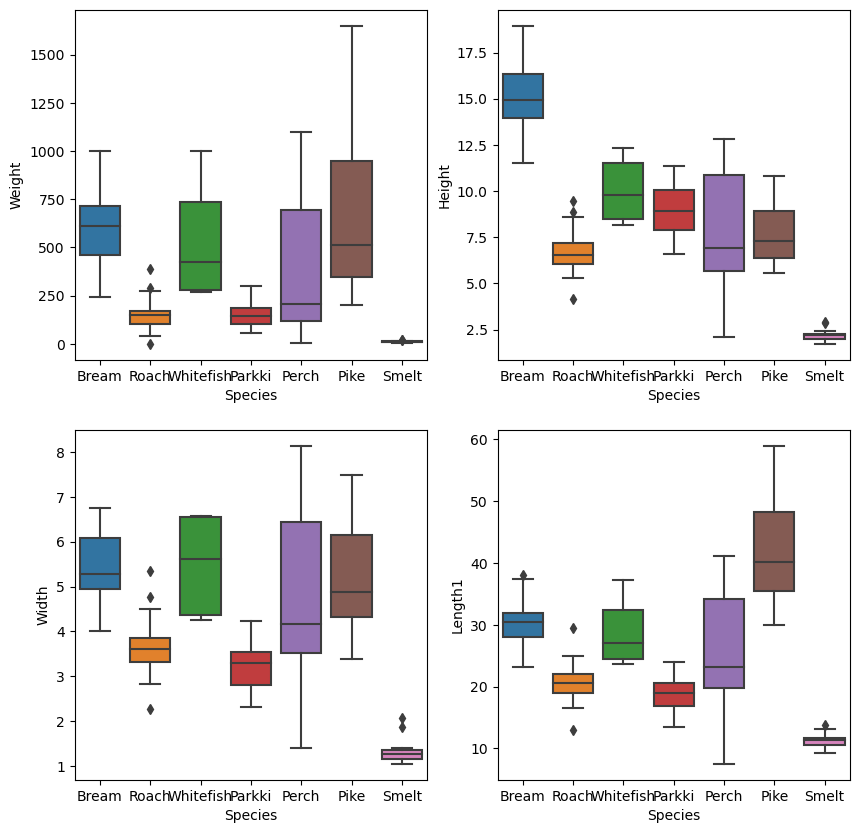

In [ ]:
#/boxplots
def graph(y):
    sns.boxplot(x="Species", y=y, data=data_fish)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Weight')

plt.subplot(222)
graph('Height')

plt.subplot(223)
graph('Width')

plt.subplot(224)
graph('Length1')

plt.show()


Axes(0.125,0.11;0.775x0.77)


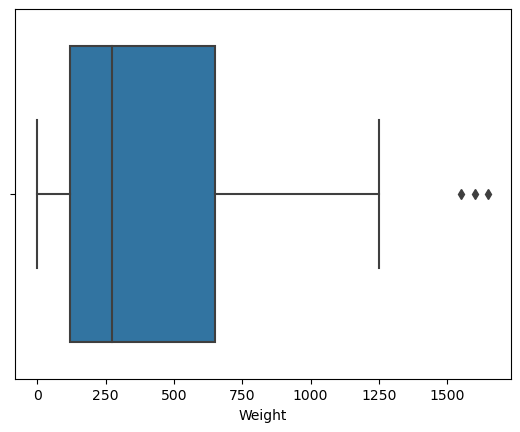

In [ ]:
print(sns.boxplot(x='Weight', data=data_fish))
#print(sns.boxplot(x='Width', data=data_fish))
#print(sns.boxplot(x='Height', data=data_fish))
#print(sns.boxplot(x='Length1', data=data_fish))
#print(sns.boxplot(x='Length2', data=data_fish))
#print(sns.boxplot(x='Length3', data=data_fish))

Old Shape:  (159, 7)
New Shape:  (156, 7)


<Axes: xlabel='Weight'>

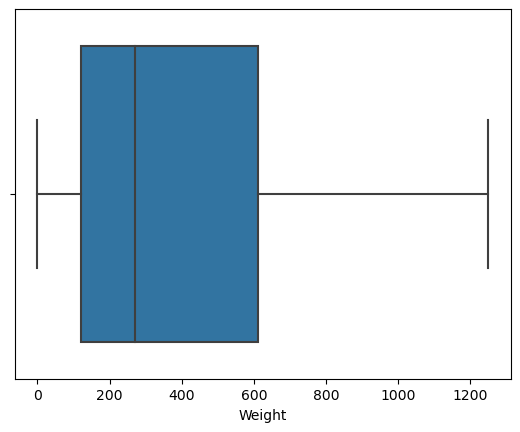

In [ ]:
#remove outliers
Q1 = np.percentile(data_fish['Weight'], 25, method = 'midpoint')

Q3 = np.percentile(data_fish['Weight'], 75, method = 'midpoint')

IQR = Q3 - Q1

print("Old Shape: ", data_fish.shape)

# Upper bound
upper = (Q3+1.5*IQR)

# Lower bound
lower = (Q1-1.5*IQR)

# Upper bound
upper_df = np.where(data_fish['Weight'] >= upper)

# Lower bound
lower_df = np.where(data_fish['Weight'] <= lower)

# Removing the Outliers
data_fish.drop(upper_df[0], inplace = True)
data_fish.drop(lower_df[0], inplace = True)

print("New Shape: ", data_fish.shape)

sns.boxplot(x='Weight', data=data_fish)

Box plot: The box plot distribution will explain how tightly the data is grouped, how the data is skewed, and also about the symmetry of data.

Outliers: A value that "lies outside" (is much smaller or larger than) most of the other values in a set of data.Outliers are important because they can have a large influence on statistics derived from the dataset.

<font color='red' size="6"><strong>Summary</font></strong>


This Project consists of 5 sections:

1. Provide descriptions of your sample and features:
The given fish dataframe dataframe contains 7 columns and 159 rows. With other words: 67 features and 159 observations.
Only one column named 'Species' has categorical data and all the other columns are of the numeric type with non-Null entries.
We can see the count of all columns named 'Weight','Length1','Length2','Length3','Height','Width' with their mean value, standard deviation, minimum and maximum values
The drop_duplicates() method removes duplicate rows of the column 'Species'.
The unique() function is used to get unique values of column 'Species'.
The value_counts() method returns the count of unique entries in the mentioned column 'Species'

2. Check for missing data:
dataframe.isnull().sum() returns the number of missing values in the dataframe

3. Identify the shape of your data Countplot:
Here, we are using Countplot,Scatterplot,Histogram,Distplot,strip plot,violin plot
Count plot: countplot plots the count of the number of records by category.
Scatter plot: A scatter plot is a set of points plotted on a horizontal and vertical axes.
Histogram: The height of each bar represents the number of values in the data set that fall within a particular bin. Distplot: A distplot plots a univariate distribution of observations.
Strip plot: It is basically a scatter plot that differentiates different categories. The values are plotted as dots along one unique axis, and the dots with the same value can overlap.
Violin plot: tool to visualize samples of small sizes.
From the above data,  we can observe in the countplot that Perch Species has the highest and White Fish has lowest.

4. Identify significant correlations Correlation:
It means association of extent to which two variables are related. correlation is in between (-1,1).

5. Spot/deal with outliers in the dataset Box Plot:
Box plot: The box plot distribution will explain how tightly the data is grouped, how the data is skewed, and also about the symmetry of data.
Outliers: A value that "lies outside" (is much smaller or larger than) most of the other values in a set of data.Outliers are important because they can have a large influence on statistics derived from the dataset.
